# Multiple Linear Regression on Advertisement Dataset.

# About the Dataset

In [ ]:
#The Sales is the dependent variable
#TV, Radio, Newspaper is Independent Variables.

In [9]:
#import libraries:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
import seaborn as sns
from scipy.stats import shapiro
from numpy.random import randn

In [10]:
data=pd.read_excel("C:/Users/HP/Downloads/advertising.xls")
data
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [11]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [13]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

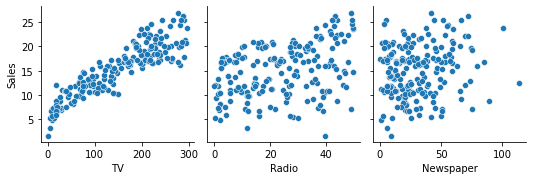

In [15]:
# ASSUMPTIONS

## Assumption of Linearity

p = sns.pairplot(data,x_vars=['TV','Radio','Newspaper'], y_vars='Sales')

In [20]:
y=data['Sales'] #Target varibale
X=data.drop('Sales',axis=1) #Feature set


In [23]:
#fit multiple linear regression model
from statsmodels.formula.api import ols
model = ols('Sales~TV+Radio+Newspaper', data=data).fit()
#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Thu, 21 Jul 2022   Prob (F-statistic):           8.13e-99
Time:                        15:21:52   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.0

In [37]:
# NORMALITY

#Shapiro test to check the Normality
#H0:Sample is from the normal distributions.(P>0.05)
#Ha(Rejected): Sample is not from the normal distributions.
from scipy.stats import shapiro
from numpy.random import randn
  
# conduct the  Shapiro-Wilk Test
shapiro(data)

#INTERPRETATION:
#Since the p value is greater than 0.05 the sample follows Normal Distribution.


ShapiroResult(statistic=0.6789248585700989, pvalue=2.487577859221278e-36)

In [25]:
# AUTOCORRELATION
#H0:Residuals are uncorrelated
#H1:Residuals are not uncorrelated
from statsmodels.stats.stattools import durbin_watson
durbin_watson(model.resid)

#Interpretation:
 #p-value is more than 0.05 hence we donot reject the null hypothesis and claim that the residuals are uncorrelated.

2.250551836079356

In [26]:
# MULTICOLLINEARITY
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for linear regression model 
y, X = dmatrices('Sales~TV+Radio+Newspaper', data=data, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

,VIF,variable
0,6.848900,Intercept
1,1.004611,TV
2,1.144952,Radio
3,1.145187,Newspaper


In [36]:
#Interpretation:
 #The VIF factors for all variables are less than 5. Hence we can claim that there is no multicollinearity#

In [35]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) 

In [28]:
# LINEAR REGRESSION
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(X_train, y_train) 
y_pred=model.predict(X_test)

print("we have completed the process of training.")

we have trained the dataset.


In [29]:
# R^2 VALUE
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8645053923967725

In [30]:
# MSE VALUE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred,squared=False)

2.126629389912894

In [31]:
# MAE VALUE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

1.417031303060066

C:\Users\HP\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


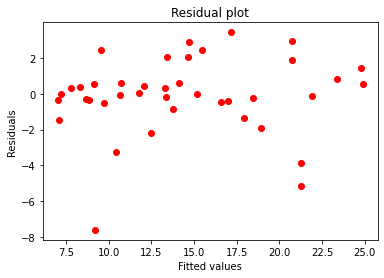

In [32]:
# HETEROSCEDASTICITY
resid=y_test-y_pred
np.mean(resid)
plt.scatter(y_pred,resid,color='red')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residual plot")

plt.show()

In [ ]:
#Interpretation:
#The points are scattered hence there is non constant variance.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


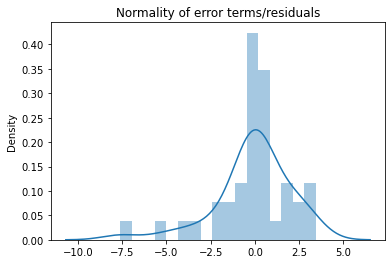

In [33]:
# NORMALITY
p = sns.distplot(resid,kde=True)
p = plt.title('Normality of error terms/residuals')

In [ ]:
#Interpretation:
#We can see that it is not mormally distributed ,It is slightly left skewed.Hence we can conclude that our model is not good one.